<h1>Part 1: Clean Up & Merging Data</h1>

In [57]:
#Import dependencies
import pandas as pd
import numpy as np
import datetime
from datetime import date,timedelta

In [58]:
#Path to database
warn_notice_path = '/Users/leslieleiva/Documents/GitHub/WARN-Notice-Analysis/Resources/July2023-April2024_Warn_Report.xlsx'

#Read and convert xlsx files into dataframe
warn_df = pd.DataFrame(pd.read_excel(warn_notice_path,
                                     sheet_name=2,
                                     skiprows=1))

#Drop NaN rows in DF
warn_df = warn_df.dropna()

#Delete unnecesary columns
del warn_df['Address']

#Rename Columns to remove '\n'
warn_df = warn_df.rename(columns={
    warn_df.columns[0] : 'County',
    warn_df.columns[1] : 'Notice Date',
    warn_df.columns[2] : 'Processed Date',
    warn_df.columns[3] : 'Effective Date',
    warn_df.columns[5] : 'Layoff Status',
    warn_df.columns[6] : 'No. of Employees'

})

#Remove 'County' from the values in 'County'
warn_df['County'] = warn_df['County'].str.replace(' County','')

#Review df
warn_df.head()

,County,Notice Date,Processed Date,Effective Date,Company,Layoff Status,No. of Employees
0,Contra Costa,2023-04-25,2023-07-03,2023-09-02,"David&rsquo;s Bridal, LLC",Layoff Permanent,29
1,Fresno,2023-04-25,2023-07-03,2023-09-02,"David&rsquo;s Bridal, LLC",Layoff Permanent,31
2,Placer,2023-04-25,2023-07-03,2023-09-02,"David&rsquo;s Bridal, LLC",Layoff Permanent,47
3,San Diego,2023-04-25,2023-07-03,2023-09-02,"David&rsquo;s Bridal, LLC",Layoff Permanent,29
4,San Diego,2023-04-25,2023-07-03,2023-09-02,"David&rsquo;s Bridal, LLC",Layoff Permanent,35


In [59]:
#Have a list with all the company names
company_list = sorted(list(warn_df['Company'].unique()))
#print(company_list)

#Creating a dictionary for the correct Company names and the typos
#Key = Correct Name
#Value = Typo variation
correction_dict = {
    '99 Cents Only Stores':'99 Cents Only Stores LLC',
    'A.C. Vroman, Inc.':"A.C. Vroman, Inc. dba Vroman's Bookstore and Book Soup",
    'ABM General Services':'ABM General Services, Inc. at FAT 1 Amazon',
    'ABM General Services':'ABM General Services, Inc. at ONT 6 Amazon',
    'ABM General Services':'ABM General Services, Inc. at PSP 1 Amazon',
    'ABM General Services':'ABM General Services, Inc. at SBD 1 Amazon',
    'ABM General Services':'ABM General Services, Inc. at SNA 4 Amazon',
    'ACRT Pacific':'ACRT Pacific',
    'ADT Solar':'ADT Solar',
    'AHMC San Gabriel Valley Medical Center':'AHMC San Gabriel Valley Medical Center LP dba San Gabriel Valley Medical Center',
    'AMP Printing':'AMP Printing',
    'AMP Printing':'AMP Printing - Mailing Address',
    'AMQ Solutions':'AMQ Solutions, LLC',
    'ATI Restoration':'ATI Restoration, LLC',
    'AVMAC':'AVMAC LLC',
    'Abbott':'Abbott Laboratories',
    'Abbott':'Abbott Vascular',
    'Accenture':'Accenture',
    'Accesso':'Accesso',
    'Ace Hotel Group':'Ace Hotel Group LLC at Ace Hotel Los Angeles',
    'Active Wellness':'Active Wellness LLC',
    'Activision Blizzard':'Activision Blizzard',
    'Acutus Medical':'Acutus Medical, Inc.',
    'Adidas America':'Adidas America, Inc.',
    'Adventist Health':'Adventist Health',
    'Adventist Health':'Adventist Health Simi Valley',
    'Age of Learning':'Age of Learning, Inc.',
    'Agilent Technologies':'Agilent Technologes',
    'Agilent Technologies':'Agilent Technologies',
    'Agilent Technologies':'Agilent Technologies, Inc.',
    'Ajinomoto Foods North America':'Ajinomoto Foods North America, Inc.',
    'Alchemee':'Alchemee, LLC',
    'Allakos':'Allakos Inc.',
    'Alsco':'Alsco Inc.',
    'Alstom Mass Transit Corp.':'Alstom Mass Transit Corp.',
    'Alto Operations California':'Alto Operations California, LLC',
    'Alvarado Hospital':'Alvarado Hospital, LLC dba Alvarado Hospital Medical Center',
    'Amazon':'Amazon',
    'Amentum at NAS':'Amentum at NAS Lemoore',
    'Amentum at NAS':'Amentum at NAS North Island',
    'Amgen':'Amgen',
    'Amware Fulfillment':'Amware Fulfillment LLC',
    'Amyris':'Amyris, Inc.',
    'Analog Devices':'Analog Devices, Inc.',
    'Anaplan':'Anaplan, Inc.',
    'Anchor Brewing Company':'Anchor Brewing Company, LLC',
    'AppFolio':'AppFolio, Inc.',
    'Apple':'Apple Inc.',
    'Arden Hills Country Club':'Arden Hills Country Club, Inc',
    'Astra Space Operations':'Astra Space Operations, LLC',
    'Atara Biotherapeutics':'Atara Biotherapeutics',
    'Aura Management':'Aura Management Co',
    'Aura Management':'Aura Management Co.',
    'Aurora Solar Inc.':'Aurora Solar Inc.',
    'B. Braun Medical Inc.':'B. Braun Medical Inc.',
    'BILL Operations':'BILL Operations, LLC',
    'BMO Bank':'BMO Bank N.A. successor in interest to Bank of the West',
    'Balfour Beatty US Civils':'Balfour Beatty US Civils',
    'Bamboo Group Operations':'Bamboo Group Operations LLC dba Bamboo Sushi',
    'Bandier West Hollywood':'Bandier West Hollywood LLC',
    'Bank of the West':'Bank of the West',
    'Baxalta US':'Baxalta US, Inc.',
    'Baxalta US':'Baxalta US, Inc. dba Takeda',
    'Bay Area PL Services':'Bay Area PL Services dba BayPLS',
    'Beauty & Essex':'Beauty & Essex',
    'Bechtel Infrastructure & Power Corporation':'Bechtel Infrastructure & Power Corporation',
    'Becton, Dickinson and Company':'Becton, Dickinson and Company',
    'Becton, Dickinson and Company':'Becton, Dickinson, and Company',
    'Becton, Dickinson and Company':'Becton, Dickinson, and Company - Pacific',
    'Berry Global, Inc.':'Berry Global, Inc.',
    'Beyond Hello CA':'Beyond Hello CA, LLC',
    'Bionano Genomics':'Bionano Genomics, Inc.',
    'BlackLine Systems':'BlackLine Systems, Inc.',
    'Block, Inc.':'Block, Inc.',
    'Bloom Energy Corporation':'Bloom Energy Corporation',
    'Blowfish':'Blowfish',
    'Blue Shield of California':'Blue Shield of California',
    'Boardriders Wholesale':'Boardriders Wholesale, LLC',
    'Boeing Company':'Boeing Company',
    'Boston Scientific Corporation':'Boston Scientific Corporation',
    'Bridge Staffing':'Bridge Staffing, LLC',
    'BrightDrop':'BrightDrop',
    'Bristol Farms Newfound Market':'Bristol Farms Newfound Market Irvine Grocery Store',
    'Bristol Myers Squibb':'Bristol Myers Squibb',
    'Broadcom':'Broadcom Inc.',
    'Brookfield Properties':'Brookfield Properties (USA II) LLC',
    'Burke Williams':'Burke Williams',
    'BuzzFeed Media Enterprises':'BuzzFeed Media Enterprises, Inc.',
    'C&E GP Specialists':'C&E GP Specialists, Inc.',
    'CSL Vifor':'CSL Vifor',
    'Cacique Foods':'Cacique Foods, LLC',
    'Pizza Hut':'CalPac Pizza II LLC dba Pizza Hut',
    'Pizza Hut':'CalPac Pizza II dba Pizza Hut',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027383',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027384',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027385',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027386',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027398',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027400',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027401',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027403',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027406',
    'Pizza Hut':'CalPac Pizza dba Pizza Hut - 027408',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029197',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029198',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029199',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029200',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029201',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029202',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029203',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029205',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029207',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029208',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029210',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029211',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029212',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029213',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029215',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029220',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029221',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029222',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029224',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029225',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029226',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029228',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029229',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029230',
    'Pizza Hut':'Southern PacPizza dba Pizza Hut - 029232',
    'Pizza Hut':'PacPartners dba Pizza Hut',
    'Pizza Hut':'PacPizza dba Pizza Hut',
    'Pizza Hut':'PacPizza dba Pizza Hut - 011664',
    'Pizza Hut':'PacPizza dba Pizza Hut - 011728',
    'Pizza Hut':'PacPizza dba Pizza Hut - 011729',
    'Pizza Hut':'PacPizza dba Pizza Hut - 011730',
    'Pizza Hut':'PacPizza dba Pizza Hut - 011753',
    'Pizza Hut':'PacPizza dba Pizza Hut - 011755',
    'Pizza Hut':'PacPizza dba Pizza Hut - 011761',
    'Pizza Hut':'PacPizza dba Pizza Hut - 014697',
    'Pizza Hut':'PacPizza dba Pizza Hut - 032516',
    'Pizza Hut':'Pacpizza dba Pizza Hut',
    'California Institute of Technology':'California Institute of Technology',
    'California Resources Corporation':'California Resources Corporation',
    'CamelBak Products':'CamelBak Products, LLC',
    'Capital One Financial':'Capital One Financial',
    'Carbon Health':'Carbon Health',
    'Carbon Health':'Carbon Health Medical Group',
    'Carbon, Inc.':'Carbon, Inc.',
    'Cardinal Glass Industries':'Cardinal Glass Industries, Inc.',
    'Catalent, Inc.':'Catalent, Inc.',
    'Centerra Group':'Centerra Group, LLC',
    'Central Admixture Pharmacy Services':'Central Admixture Pharmacy Services, Inc.',
    'Cepheid':'Cepheid',
    'Certified Freight Logistics':'Certified Freight Logistics, Inc.',
    'ChargePoint':'ChargePoint, Inc.',
    'Charles River Laboratories':'Charles River Laboratories, Inc.',
    'Charles Schwab & Co.':'Charles Schwab & Co., Inc.',
    'Chart Inc.':'Chart Inc.',
    'Checkr':'Checkr, Inc.',
    'Chick-fil-A':'Chick-fil-A',
    'Circle C Ranch':'Circle C Ranch, Inc.',
    'Cisco Systems':'Cisco Systems, Inc.',
    'City National Bank':'City National Bank',
    'Clari':'Clari Inc.',
    'Codexis':'Codexis, Inc.',
    'Coherent Corp.':'Coherent Corp.',
    'Cole Haan':'Cole Haan',
    'Collins Pine Company':'Collins Pine Company',
    'Command Security Service':'Command Security Service LP at Google/Bayview',
    'Company 3 Method':'Company 3 Method Inc.',
    'Company 3 Method':'Company 3/Method Inc',
    'Comprehensive Autism Center':'Comprehensive Autism Center',
    'Container Connection':'Container Connection',
    'ContextLogic Inc.':'ContextLogic Inc.',
    'Coronado Brewing Company':'Coronado Brewing Company, Inc.',
    'Corteva Agriscience':'Corteva Agriscience LLC',
    'Cotton On La Mirada Distribution Center':'Cotton On La Mirada Distribution Center',
    'Country Club Mortgage':'Country Club Mortgage',
    'Country Club Mortgage':'Country Club Mortgage - Center',
    'Country Club Mortgage':'Country Club Mortgage - Hall',
    'Covanta Long Beach Renewable Energy Corp.':'Covanta Long Beach Renewable Energy Corp.',
    'Covanta Projects':'Covanta Projects, LLC',
    'Covenant Living Communities & Services':'Covenant Living Communities & Services (Covenant Living West) dba Brandel Manor and Cypress Assisted',
    'Cracker Barrel':'Cracker Barrel',
    'Cruise LLC':'Cruise LLC - CC',
    'Cruise LLC':'Cruise LLC - Headquarters',
    'Crunchbase':'Crunchbase',
    'Crystal Geyser Water Company':'Crystal Geyser Water Company',
    'Cue Health':'Cue Health - Moda South',
    'Cue Health':'Cue Health Inc',
    'Cue Health':'Cue Health Inc.',
    'Cue Health':'Cue Health, Moda North',
    'Cue Health':'Cue Health, Moda North II',
    'Cue Health':'Cue Health, Moda West',
    'Cue Health':'Cue Health, Vista',
    'Cue Health':'Cue Health, Waples',
    'Cummins Meritor':'Cummins Meritor',
    'Curio Employer':'Curio Employer LLC',
    'Curio Employer':'Curio Employer LLC dba The Hotel del Coronado, Curio Collection by Hilton',
    'Cygnus Home Service':'Cygnus Home Service, LLC dba Yelloh',
    'DHL Supply Chain':'DHL Supply Chain',
    'Deliver-It':'DI Overnite LLC/DI Express LLC dba Deliver-IT',
    'Deliver-It':'DI Overnite LLC/DI Express LLC dba Deliver-It',
    'DXS Logistics':'DXS Logistics LLC',
    'Dabico Airport Solutions':'Dabico Airport Solutions, Inc.',
    'Daifuku Services America Corporation':'Daifuku Services America Corporation',
    'Dairy Farmers of America':'Dairy Farmers of America, Inc.',
    'Daiso Distribution Center':'Daiso Distribution Center',
    "David's Bridal":"David's Bridal",
    "David's Bridal":"David's Bridal, LLC",
    "David's Bridal":'David&rsquo;s Bridal, LLC',
    "David's Bridal":"David's Bridal, LLC",
    "David's Bridal":'David&rsquo;s Bridal, LLC',
    'DazPak Flexible Packaging':'DazPak Flexible Packaging',
    'DePuy Synthes Products':'DePuy Synthes Products, Inc.',
    'Del Friscos Grille':'Del Friscos Grille',
    'Allen Brothers West Coast':'Del Monte Capitol Meat Company, LLC DBA Allen Brothers West Coast',
    'Allen Brothers West Coast':'Del Monte Capitol Meat Company, LLC dba Allen Brothers West Coast',
    'Delta Dental Plan of California':'Delta Dental Plan of California',
    'Z Gallerie':'DirectBuy Home Improvement, Inc. dba Z Gallerie',
    'Z Gallerie':'DirectBuy Home Improvement, Inc. dba Z Gellerie',
    'Discord':'Discord Inc.',
    'Distribution Alternatives':'Distribution Alternatives, Inc.',
    'Divvy Homes':'Divvy Homes Inc.',
    'DreamWorks Animation':'DreamWorks Animation LLC',
    "Dreyer's Grand Ice Cream":"Dreyer's Grand Ice Cream",
    "Dreyer's Grand Ice Cream":"Dryer's Grand Ice Cream",
    'Dynaflex Prodcuts':'Dynaflex Prodcuts',
    'E. J. Lauren':'E. J. Lauren, LLC',
    'EchoPark Automotive Long Beach':'EchoPark Automotive Long Beach',
    'Eclipse Advantage':'Eclipse Advantage, LLC at Rite Aid',
    'El Dorado National (California)':'El Dorado National (California), Inc.',
    'Elevance Health':'Elevance Health, Inc.',
    'Epic Games':'Epic Games',
    'Ericsson Inc.':'Ericsson Inc.',
    'Exabeam, Inc.':'Exabeam, Inc.',
    'Round Table Pizza':'Excalibur Pizza LLC',
    'Round Table Pizza':'Excalibur Pizza LLC dba Round Table Pizza',
    'Exelixis':'Exelixis, Inc.',
    'Experian Information Solutions':'Experian Information Solutions, Inc.',
    'FM Restaurants HQ':'FM Restaurants HQ, LLC',
    'FM Restaurants HQ':'FM Restaurants HQ, LLC dba El Torito Mexican Grill',
    'FUJIFILM Irvine Scientific':'FUJIFILM Irvine Scientific, Inc.',
    'FabFitFun Fulfillment Center':'FabFitFun Fulfillment Center',
    'Faire Wholesale':'Faire Wholesale, Inc.',
    'Family YMCA':'Family YMCA of the Desert at Palm Desert Aquatic Center',
    'Farmers Group, Inc.':'Farmers Group, Inc.',
    'Farmers Group, Inc.':'Farmers Group, Inc. - 6301',
    'Farmers Insurance Exchange':'Farmers Insurance Exchange',
    'Farmers Insurance Exchange':'Farmers Insurance Exchange - 6303',
    'Fashion Institute of Design & Merchandising':'Fashion Institute of Design & Merchandising',
    'Fashion Institute of Design & Merchandising':'Fashion Institute of Design & Merchandising FIDM',
    'FedEx Supply Chain, Inc.':'FedEx Supply Chain, Inc.',
    'Federal Express Corporation':'Federal Express Corporation',
    'FibroGen, Inc.':'FibroGen, Inc.',
    'First Financial Credit Union':'First Financial Credit Union',
    'Fish Market Restaurants, Inc.':'Fish Market Restaurants, Inc.',
    'Flex LTD':'Flex LTD',
    'Flexport':'Flexport, Inc.',
    'ForgeRock':'ForgeRock, Inc.',
    'Airtable':'Formagrid Inc. dba Airtable',
    'Foundation for California Community Colleges':'Foundation for California Community Colleges',
    'Front Porch Communities and Services':'Front Porch Communities and Services',
    'Full Steam Staffing':'Full Steam Staffing',
    'G&C Staffing':'G&C Staffing (The Parent Company - TPCO)',
    'GE United Technologies':'GE United Technologies II Inc.',
    'GE United Technologies':'GE United Technologies LLC',
    'GXO Logistics Supply Chain, Inc.':'GXO Logistics Supply Chain, Inc.',
    'Visalia Times Delta':'Gannett Publishing Services dba Visalia Times Delta',
    'GAP':'Gap, Inc.',
    'Gemological Institute of America':'Gemological Institute of America, Inc. (GIA)',
    'Genentech':'Genentech, Inc.',
    'Gibson Overseas':'Gibson Overseas, Inc.',
    'Gilead Sciences':'Gilead Sciences',
    'Gillette Citrus':'Gillette Citrus, Inc.',
    'Ginger.io':'Ginger.io,. Inc.',
    'Global Expedited Transportation':'Global Expedited Transportation, Inc.',
    'Global Medical Response':'Global Medical Response',
    'Google':'Google',
    'Google':'Google US-MTV-1900',
    'Google':'Google US-MTV-1945',
    'Google':'Google US-MTV-1950',
    'Google':'Google US-MTV-1965',
    'Google':'Google US-MTV-2000',
    'Google':'Google US-MTV-40',
    'Google':'Google US-MTV-41',
    'Google':'Google US-MTV-42',
    'Google':'Google US-MTV-43',
    'Google':'Google US-MTV-CL2',
    'Google':'Google US-MTV-CL3',
    'Google':'Google US-MTV-CL4',
    'Google':'Google US-MTV-CL5',
    'Google':'Google US-MTV-RLS1',
    'Google':'Google US-MTV-RLS2',
    'Google':'Google US-MTV-STLN2027',
    'Google':'Google US-MTV-STLN2029',
    'Google':'Google US-MTV-STLN2051',
    'Google':'Google US-MTV-STLN2061',
    'Google':'Google US-SFO-1MST',
    'Google':'Google US-SFO-FRE215',
    'Google':'Google US-SFO-MKT1',
    'Google':'Google US-SFO-SPE',
    'Google':'Google US-SVL-CRSM1225',
    'Google':'Google US-SVL-CRSM1260',
    'Google':'Google US-SVL-CRSM1265',
    'Google':'Google US-SVL-HMBLT1',
    'Google':'Google US-SVL-HMBLT3',
    'Google':'Google US-SVL-HMBLT4',
    'Grammarly':'Grammarly, Inc.',
    'Mission Foods':'Gruma Corp dba Mission Foods',
    'HMI':'HMI',
    'HMSHost':'HMSHost',
    'HMSHost':'HMSHost located at Admirals Clubs & Lounges at Los Angeles International Airport (LAX)',
    'Hallcon Corporation':'Hallcon Corporation',
    'Happy Money':'Happy Money, Inc.',
    'Hawker Pacific Aerospace':'Hawker Pacific Aerospace, Inc.',
    'Headspace':'Headspace, Inc.',
    'Headway Technologies':'Headway Technologies Inc.',
    'Henry Mayo Newhall Hospital':'Henry Mayo Newhall Hospital',
    'Herbalife International of America':'Herbalife International of America, Inc',
    'Herbalife International of America':'Herbalife International of America, Inc.',
    'Hinge Health, Inc.':'Hinge Health, Inc.',
    'Hollingsworth':'Hollingsworth LLC',
    'Connect Homes':'Home EC, Inc. dba Connect Homes',
    'Hyatt Centric':'Hyatt Centric',
    'Hyperloop':'Hyperloop One',
    'Hyperloop':'Hyperloop Technologies, Inc. dba Hyperloop One',
    'IKEA':'IKEA Distribution Services, Inc.',
    'ISU PETASYS CORP.':'ISU PETASYS CORP.',
    'ITC Federal':'ITC Federal',
    'Il Fornaio (America)':'Il Fornaio (America) LLC dba Il Fornaio Pasadena Ristorante',
    'Illumina Inc':'Illumina Inc. World Headquarters',
    'Illumina Inc':'Illumina, Inc.',
    'Illumina Inc':'Illumina, Inc. Worldwide Headquarters',
    'Image Solutions Apparel':'Image Solutions Apparel, Inc',
    'ImmunityBio':'ImmunityBio, Inc.',
    'Imperial Bag & Paper Co.':'Imperial Bag & Paper Co. LLC, dba Imperial Dade',
    'In-N-Out Burgers':'In-N-Out Burgers, a California corporation',
    'Individualized ABA Services for Families':'Individualized ABA Services for Families dba IABAS For Families',
    'Informatica':'Informatica LLC',
    'Intel Corporation':'Intel Corporation',
    'Intense Lighting':'Intense Lighting, LLC',
    'Invitae Corporation':'Invitae Corporation',
    'J.B. Hunt Transport':'J.B. Hunt Transport, Inc.',
    'JUUL Labs':'JUUL Labs',
    'JUUL Labs':'JUUL Labs - 270',
    'JUUL Labs':'JUUL Labs - 271',
    'JUUL Labs':'JUUl Labs - 270',
    'Jabil Inc.':'Jabil Inc.',
    'Juul Labs':'Jabil, Inc.',
    'Jacmar Foodservice Distribution':'Jacmar Foodservice Distribution, LLC',
    'Janssen Research & Development':'Janssen Research & Development, LLC',
    'Jensen Enterprises Inc':'Jensen Enterprises Inc. dba Jensen Precast',
    'John Muir Health (JMH)':'John Muir Health (JMH)',
    'Johns Manville':'Johns Manville',
    'Johnson & Johnson':'Johnson & Johnson Consumer Inc. dba Kenvue',
    'Joy Signal Technology':'Joy Signal Technology',
    'Juniper Networks':'Juniper Networks, Inc.',
    'Juul Labs':'Juul Labs - 270',
    'Juul Labs':'Juul Labs, Inc.',
    'Juul Labs':'Juul Labs, Inc. - 270',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - Arrow',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - Canyon',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - Fair Oaks',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - Harrison',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - Lakeside',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - Mission',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - One',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - Ordway Building',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - Pasadena',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals - Rio',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals-Los Robles',
    'Kaiser Foundation Hospitals':'Kaiser Foundation Hospitals-Walnut',
    'KeHE Distributors':'KeHE Distributors, Inc.',
    'Kett Engineering Corporation':'Kett Engineering Corporation',
    'Kinecta Federal Credit Union':'Kinecta Federal Credit Union',
    'Kings Garden':'Kings Garden, Inc.',
    'Kitayama Brothers':'Kitayama Brothers Inc.',
    'Knauf Insulation Inc.':'Knauf Insulation Inc.',
    'Knox Attorney Service':'Knox Attorney Service, Inc.',
    'Kraft Heinz Foods Company':'Kraft Heinz Foods Company',
    'Kuubix Global':'Kuubix Global LLC',
    'Kuubix Global':'Kuubix Global, LLC',
    'L3 Technologies':'L3 Technologies, Inc., a wholly owned subsidiary of L3Harris Technologies',
    'LAVO Italian Restaurant':'LAVO Italian Restaurant San Diego',
    'LEER Group':'LEER Group',
    'LEER Group':'LEER Group - 1242',
    'La Reina, CA Religious Nonprofit Corp':'La Reina, a California religious nonprofit corporation, aka La Reina High School and Middle School',
    'La Tortilla Factory':'La Tortilla Factory',
    'La Tortilla Factory':'La Tortilla Factory, Inc.',
    'Lance Camper Mfg. Corp':'Lance Camper Mfg. Corp',
    'Langmuir Systems':'Langmuir Systems, LLC',
    'Lazy Dog Restaurant and Bar':'Lazy Dog Restaurant and Bar',
    'Legacy Supply Chain Services':'Legacy Supply Chain Services II',
    'Leggett & Platt, Inc.':'Leggett & Platt, Incorporated',
    'LendingClub Bank':'LendingClub Bank',
    'Lendlease Americas Inc.':'Lendlease Americas Inc.',
    'Levi Strauss & Co.':'Levi Strauss & Co.',
    'Levy Premium Foodservice':'Levy Premium Foodservice Limited Partnership',
    'Levy Premium Foodservice':'Levy Premium Foodservice Limited Partnership at The Rose Bowl',
    'Lifelong Medical Care':'Lifelong Medical Care dba Lifelong Ashby Health Center',
    'Liminex, Inc.':'Liminex, Inc. dba GoGuardian',
    'LinkedIn':'LinkedIn Corporation',
    'Locanabio':'Locanabio, Inc.',
    'Lockheed Martin':'Lockheed Martin',
    'Lockheed Martin':'Lockheed Martin Space',
    'Lonza Biologics':'Lonza Biologics, Inc.',
    'Los Angeles Times Communications':'Los Angeles Times Communications LLC',
    'Lumentum Operations':'Lumentum Operations LLC',
    'Lund Motion Products':'Lund Motion Products, Inc.',
    'MV Transportation, Inc.':'MV Transportation, Inc.',
    "Macy's":"Macy's Bayfair Store",
    "Macy's":"Macy's Eagle Rock Plaza Store",
    "Macy's":"Macy's Simi Valley Town Center Store",
    'Instacart':'Maplebear Inc. dba Instacart',
    'Marriott':'Marriott San Mateo Hotel',
    'Marvell Semiconductor, Inc.':'Marvell Semiconductor, Inc.',
    'MasterBrand Cabinets LLC':'MasterBrand Cabinets LLC',
    'Matheson Inc':'Matheson Flight Extenders, Inc.',
    'Matheson Inc':'Matheson Postal Services, Inc.',
    'Matheson Inc':'Matheson Trucking, Inc.',
    'MaxLite, Inc.':'MaxLite, Inc.',
    'Maxar Space':'Maxar Space LLC - Charleston',
    'Maxar Space':'Maxar Space LLC - Fabian',
    'Maxar Space':'Maxar Space LLC - Meadow',
    'Maxar Space':'Mazar Space LLC - Leghorn',
    'MedMen Enterprises':'MedMen Enterprises Inc.',
    'Medtronic':'Medtronic, Inc.',
    "MemorialCare Long Beach Medical Center":"MemorialCare Long Beach Medical Center and Miller Children's and Women's Hospital Long Beach",
    'Mercy Medical Transportation':'Mercy Medical Transportation, Inc.',
    "Javier's Newport Beach":"Mexi-Grill, LLC dba Javier's Newport Beach",
    'Microsoft':'Microsoft',
    "Miyoko's PBC":"Miyoko's PBC",
    'Momentum for Health':'Momentum for Health',
    'Monte Nido & Affiliates':'Monte Nido & Affiliates',
    'The Dog':'Moondoggies, Inc dba The Dog',
    'Morrison Healthcare':'Morrison Healthcare at Adventist Health Bakersfield',
    'NEOTech':'NEOTech',
    'NFI National Distribution Centers':'NFI National Distribution Centers LLC',
    'NRI USA':'NRI USA, LLC',
    'NSI Services':'NSI Services, Inc.',
    'NZXT':'NZXT, Inc.',
    'National Distribution Centers':'National Distribution Centers, LLC',
    'Natural Alternatives International':'Natural Alternatives International',
    'Neovia Logistics Distribution':'Neovia Logistics Distribution, LP',
    'Nestle':'Nestle USA',
    'Nevro Corp.':'Nevro Corp.',
    'Newark Group':'Newark Group, Inc.',
    'Newell Brands Distribution':'Newell Brands Distribution LLC',
    'NextGen Healthcare':'NextGen Healthcare, Inc.',
    'Nextdoor':'Nextdoor, Inc.',
    'Niagara Bottling':'Niagara Bottling LLC',
    'Niantic, Inc.':'Niantic, Inc.',
    'Nobel House Home Furnishings':'Nobel House Home Furnishings LLC',
    'Nobel House Home Furnishings':'Noble House Home Furnishing LLC Superior HQ',
    'Nobel House Home Furnishings':'Noble House Home Furnishings - 7901 Deering',
    'Nobel House Home Furnishings':'Noble House Home Furnishings LLC',
    'Nobel House Home Furnishings':'Noble House Home Furnishings LLC GDF Outlet',
    'Nobel House Home Furnishings':'Noble House Home Furnishings LLc',
    'Nordson Corporation':'Nordson Corporation',
    'Nordstrom':'Nordstrom',
    'Northrop Grumman':'Northrop Grumman',
    'NuVasive, Inc.':'NuVasive, Inc.',
    'OTS Solutions':'OTS Solutions, LLC dba On Time Staffing',
    'Ojai Valley Inn':'Ojai Valley Inn',
    'Okta, Inc.':'Okta, Inc.',
    'Oracle America, Inc.':'Oracle America, Inc. at Adventist Health',
    'Organic Milling':'Organic Milling - Acacia Facility',
    'Organic Milling':'Organic Milling - Allen Facility',
    'Orion Strategic Solutions':'Orion Strategic Solutions LLC',
    'Osso VR, Inc.':'Osso VR, Inc.',
    'Owens-Brockway Glass Container':'Owens-Brockway Glass Container Inc.',
    'Owens-Brockway Glass Container':'Owens-Brockway Glass Container, Inc.',
    'PIRCH':'PIRCH',
    'PKL Services Inc':'PKL Services Inc',
    'PLI Holdings, Inc.':'PLI Holdings, Inc.',
    'PWLC I, Inc.':'PWLC I, Inc.',
    'Pac-12':'Pac-12 Conference',
    'Pac-12':'Pac-12 Enterprises, LLC',
    'Pacific Catch':'Pacific Catch, Inc.',
    'Pacific Coast Sightseeing Tours & Charters':'Pacific Coast Sightseeing Tours & Charters, Inc.',
    'Golden Gate Fields':'Pacific Racing Association dba Golden Gate Fields',
    'Palmdale Regional Medical Center':'Palmdale Regional Medical Center',
    'Para Los Ninos':'Para Los Ninos',
    'Paramount Global':'Paramount Global',
    'Parker Hannifin Corporation':'Parker Hannifin Corporation',
    'Parker Hannifin Corporation':'Parker Hannifin Corporation BWF Division',
    'Participant Media, LLC':'Participant Media, LLC',
    'PayPal':'PayPal',
    'Peloton Interactive Inc.':'Peloton Interactive Inc.',
    'Pennymac':'Pennymac',
    'Penske Logistics':'Penske Logistics, LLC providing services for Aldi, Inc.',
    'Perfect Day, Inc.':'Perfect Day, Inc.',
    'Performance Plastics, Inc.':'Performance Plastics, Inc.',
    'Personalis':'Personalis, Inc.',
    'PetVet Care Centers':'PetVet Care Centers (California), Inc.',
    'Petco':'Petco Animal Supplies Stores',
    'Pfizer':'Pfizer',
    'PhenomeX Inc.':'PhenomeX Inc.',
    'Phillips Tool & Die, Inc':'Phillips Tool & Die, Inc. dba Busy Bee Tooling',
    'Pixelberry Studios':'Pixelberry Studios',
    'Pizza Antica Mill Valley':'Pizza Antica Mill Valley',
    'Planet Labs PBC':'Planet Labs PBC',
    'Plenty Unlimited Inc.':'Plenty Unlimited Inc.',
    'Point Digital Finance, Inc.':'Point Digital Finance',
    'Post Acute Registry':'Post Acute Registry LLC',
    'Primary Health':'Primary Health',
    'Project Fusion':'Project Fusion, LLC',
    'Prolific Logistics LLC':'Prolific Logistics LLC',
    'Proterra Operating Company':'Proterra Operating Company, Inc.',
    'Providence Holy Cross Medical Center':'Providence Holy Cross Medical Center',
    'Pure Storage':'Pure Storage, Inc.',
    'QG Printing II':'QG Printing II, LLC',
    'Qualcomm Incorporated':'Qualcomm Incorporated',
    'Quality Fabrication Inc.':'Quality Fabrication Inc.',
    'Quanex Homeshield':'Quanex Homeshield LLC',
    'REACH Medical Holdings':'REACH Medical Holdings',
    'RSN Co.':'RSN Co., LLC dba Bally Sports San Diego',
    'Reins International California':'Reins International California, Inc. dba Gyu-Kaku',
    'Renesas Electronics Corporation':'Renesas Electronics Corporation',
    'ResMEd Inc.':'ResMEd Inc.',
    'Resort Vacations, Inc.':'Resort Vacations, Inc.',
    'WIS International':'Retail Services WIS Corporation, dba WIS International',
    "D' Addario Woodwinds": "Rico Corp. dba D' Addario Woodwinds",
    "D' Addario Woodwinds":  "Rico Corp. dba D'Addario Woodwinds",
    'Ridgecrest Regional Hospital':'Ridgecrest Regional Hospital',
    'Rieke LLC':'Rieke LLC',
    'Riot Games':'Riot Games',
    'South Coast Baking':'Rise Baking Company dba South Coast Baking, LLC',
    'Rivian Automotive':'Rivian Automotive, LLC',
    'Robert Bosch':'Robert Bosch LLC',
    'Robinhood Markets':'Robinhood Markets, Inc.',
    'Rodan & Fields':'Rodan & Fields, LLC',
    'Roku':'Roku, Inc.',
    'Ruan Transport Corporation':'Ruan Transport Corporation',
    'SAP America':'SAP America, Inc.',
    'SCAT Enterprises':'SCAT Enterprises LLC',
    'Solidigm':'SK hynix NAND Product Solutions Corp. dba Solidigm',
    'SMTC Corporation':'SMTC Corporation',
    'SP+ Corporation':'SP+ Corporation at Hollywood Burbank Airport',
    'SPS Ventures':'SPS Ventures Inc.',
    'SPT Microtechnologies USA':'SPT Microtechnologies USA, Inc.',
    'Safeway':'Safeway',
    'Safran Cabin':'Safran Cabin, Inc.',
    'Sakata Seed America':'Sakata Seed America, Inc.',
    'Salesforce':'Salesforce, Inc.',
    'San Diego Imaging Management':'San Diego Imaging Management, Inc.',
    'Sangamo Therapeutics':'Sangamo Therapeutics, Inc.',
    'Sanofi':'Sanofi',
    'Scenario-Cockram USA':'Scenario-Cockram USA, Inc.',
    'Scripps Health':'Scripps Health',
    'Sega of America':'Sega of America, Inc.',
    'Shadow Holdings':'Shadow Holdings, LLC dba Bright Innovation Labs',
    'Shadow Holdings':'Shadow Holdings, LLC.',
    'Shaw Industries Group':'Shaw Industries Group Inc. Plant WG',
    'Shift Technologies':'Shift Technologies, Inc.',
    'Silgan Containers Manufacturing Corporation':'Silgan Containers Manufacturing Corporation',
    'Snap Inc.':'Snap Inc.',
    'SoCal Pizza Holdings':'SoCal Pizza Holdings, LLC',
    'SoCal South OC':'SoCal South OC LLC',
    'Sober Living by the Sea':'Sober Living by the Sea, Inc.',
    'Sodexo, Inc.':'Sodexo, Inc. and Affiliates at Beverly Hospital',
    'Sonoco':'Sonoco',
    'Sony':'Sony Interactive Entertainment LLC',
    'Sorrento Therapeutics':'Sorrento Therapeutics, Inc.',
    'Southern California Pizza Company':'Southern California Pizza Company LLC',
    'Southern Counties Express':'Southern Counties Express',
    'Spencer Construction':'Spencer Construction, LLC',
    'Splash Cafe':'Splash Cafe, Inc. dba Splash Cafe Artisan Bakery',
    'Splunk Inc.':'Splunk Inc.',
    'Spotify':'Spotify USA Inc',
    'Spotify':'Spotify USA Inc.',
    'St James Infirmary':'St James Infirmary',
    'St. John of God Health Care Services':'St. John of God Health Care Services',
    'St. Vincent de Paul High School':'St. Vincent de Paul High School',
    'Stanislaus Surgical Hospital':'Stanislaus Surgical Hospital',
    'Steelcase Inc.':'Steelcase Inc.',
    'Stir Foods':'Stir Foods, LLC',
    'Sugar Foods':'Sugar Foods LLC',
    'Sumo Logic':'Sumo Logic, Inc.',
    'Sunrise Growers Inc.':'Sunrise Growers Inc.',
    'Sunrun Inc.': 'Sunrun Inc.',
    'Sunrun Inc.': 'Sunrun Inc. - Angus',
    'Surefox North America Inc':'Surefox North America Inc',
    'Surgalign Spine Technologies':'Surgalign Spine Technologies, Inc.',
    'Syngenta Seeds':'Syngenta Seeds, LLC',
    'T. Hasegawa U.S.A.':'T. Hasegawa U.S.A., Inc.',
    'TAO Group Hospitality':'TAO Group Hospitality',
    'TE Connectivity':'TE Connectivity',
    'TIDAL':'TIDAL, a subsidary of Block, Inc.',
    'TMG Hotel':'TMG Hotel Figueroa F&B Venues',
    'TTM Technologies':'TTM Technologies, Inc., subsidiary of TTM Technologies North America, LLC',
    'TVT Trucking, Inc':'TVT Trucking, Inc. and FTU Labor Contractors',
    'Talis Biomedical Corporation':'Talis Biomedical Corporation',
    'Target':'Target Corporation',
    'Tattooed Chef':'Tattooed Chef - 6304',
    'Tattooed Chef':'Tattooed Chef - 6305',
    'Tattooed Chef':'Tattooed Chef - 6309',
    'Tattooed Chef':'Tattooed Chef - 6325',
    'Tattooed Chef':'Tattooed Chef - 6403',
    'Tattooed Chef':'Tattooed Chef - 6409',
    'Tattooed Chef':'Tattooed Chef - 6411',
    'Tattooed Chef':'Tattooed Chef, Inc., wholly owned subsidiary Ittella International, LLC',
    'Technical Consumer Products':'Technical Consumer Products, Inc.',
    'Telecare Corporation':'Telecare Corporation',
    'Temple Nightclub':'Temple Nightclub',
    'Tempo Automation Holdings':'Tempo Automation Holdings, Inc.',
    'Terre du Soleil':'Terre du Soleil dba Auberge du Soleil',
    'The Apothecarium':'The Apothecarium',
    'The Boeing Company':'The Boeing Company',
    'The Health Trust':'The Health Trust',
    'The Hills Hotel':'The Hills Hotel',
    'The Hotel del Coronado':'The Hotel del Coronado',
    'The Real Good Food Company':'The Real Good Food Company, LLC',
    'The Rinks Foundation':'The Rinks Foundation',
    'The Ronin Project':'The Ronin Project, Inc.',
    'The Vons Companies':'The Vons Companies Inc.',
    'Thermo Fisher Scientific':'Thermo Fisher Scientific',
    'Tower Semiconductor':'Tower Semiconductor',
    'Transdev Services':'Transdev Services, Inc.',
    'Tri-City Medical Center':'Tri-City Medical Center',
    'TriLink Biotechnologies':'TriLink Biotechnologies, LLC and Maravai Intermediate Holdings, LLC',
    'Tropitone Furniture Company':'Tropitone Furniture Company, Inc.',
    'Trove Recommerce':'Trove Recommerce',
    'TuSimple, Inc.':'TuSimple, Inc.',
    'Twitch Interactive, Inc.':'Twitch Interactive, Inc. SFO19 Facility',
    'U.S. Bank':'U. S. Bank (1296)',
    'U.S. Bank':'U.S. Bank',
    'U.S. Bank':'U.S. Bank (1289)',
    'U.S. Bank':'U.S. Bank (1296)',
    'U.S. Bank':'U.S. Bank (1296) ',
    'Universal Music Group':'UMG Recordings, Inc. (Universal Music Group)',
    'UPS':'UPS',
    'United Road Services':'URS Midwest, Inc dba United Road Services',
    'US Display Group':'US Display Group',
    'US Motor Works':'US Motor Works, LLC',
    'USS-UPI':'USS-UPI, LLC',
    'Unity Technologies':'Unity Technologies SF',
    'Universal Intermodal Services, Inc.':'Universal Intermodal Services, Inc.',
    'Universal Protection Service':'Universal Protection Service, LP dba Allied Universal Security Services',
    'VF Santa Fe Springs Distribution Center':'VF Santa Fe Springs Distribution Center',
    'Valiant Integrated Services':'Valiant Integrated Services',
    'Valley Processing':'Valley Processing, a HEXPOL Company',
    'Vans HQ':'Vans HQ',
    'Vertical Supply Group':'Vertical Supply Group',
    'Viasat, Inc':'Viasat, Inc',
    'Viasat, Inc':'Viasat, Inc.',
    'Vionic Consumer Care Operations':'Vionic Consumer Care Operations',
    'Virgin Galactic':'Virgin Galactic, LLC',
    'Visalia Citrus Packing Group':'Visalia Citrus Packing Group, Inc.',
    'Volta Inc.':'Volta Inc.',
    'TCWGlobal':'WMBE Payrolling Inc. dba TCWGlobal',
    'WaFD Bank':'WaFD Bank',
    'Walmart':'Walmart',
    'Walters & Wolf Precast':'Walters & Wolf Precast',
    'Watermark Services':'Watermark Services IV, LLC',
    'Wayfair':'Wayfair, LLC',
    'Lowell Farms':'Wellness Innovation Group Inc. dba Lowell Farms',
    'Wells Fargo':'Wells Fargo',
    'West Coast Industries':'West Coast Industries, Inc.',
    'Western Digital':'Western Digital',
    'Western Power Sports':'Western Power Sports, LLC',
    'William Kreysler & Associates':'William Kreysler & Associates, Inc.',
    'Williams-Sonoma Direct':'Williams-Sonoma Direct, Inc.',
    'Monocle':'Winkontent Limited dba Monocle',
    'Wolfspeed, Inc.':'Wolfspeed, Inc.',
    'Woodbury University':'Woodbury University',
    'Woodland Rite Aid Distribution Center':'Woodland Rite Aid Distribution Center',
    'Workforce Enterprises':'Workforce Enterprises',
    'Xcite Steps':'Xcite Steps, a wholly owned subsidiary of Invo Healthcare, LLC',
    'Xerxes Corporation':'Xerxes Corporation',
    'Yelloh':'Yelloh',
    'Yellow Corporation':'Yellow Corporation',
    'Yellow Corporation':'Yellow Corporation-Batavia St.',
    'Yellow Corporation':'Yellow Corporation-Eckhoff',
    'Kelly Toys Holding':'Z Global Logistics dba Kelly Toys Holding LLC',
    'Zwift, Inc.':'Zwift, Inc.',
    'Zymergen Inc.':'Zymergen Inc.',
    'dnata US Inflight Catering': 'dnata US Inflight Caterin',
    'dnata US Inflight Catering':  'dnata US Inflight Catering',
    'eBay Inc.':'eBay Inc.'
}

#Convert dict to dataframe
correction_df = pd.DataFrame(correction_dict.items(),
                             columns=['Correct Spelling','Company'])

#Save as a csv
correction_df.to_csv('/Users/leslieleiva/Documents/GitHub/WARN-Notice-Analysis/Resources/correct_company_names.csv')

#View df
correction_df.head()

,Correct Spelling,Company
0,99 Cents Only Stores,99 Cents Only Stores LLC
1,"A.C. Vroman, Inc.","A.C. Vroman, Inc. dba Vroman's Bookstore and B..."
2,ABM General Services,"ABM General Services, Inc. at SNA 4 Amazon"
3,ACRT Pacific,ACRT Pacific
4,ADT Solar,ADT Solar


<h3>Merge the Resouce Data </h3>

In [60]:
#Merge 'Company' & 'Original Spelling' columns into new dataframe
merged_df = warn_df.merge(correction_df, on='Company', how='inner')

#Delete Unneeded Column 'Company'
del merged_df['Company']

#Rename 'Correct Spelling' to 'Company'
merged_df = merged_df.rename(columns= {
    'Correct Spelling':'Company'})

#Rearrange df
merged_df = merged_df[['County',
                       'Company',
                       'Layoff Status',
                       'No. of Employees',
                       'Notice Date',
                       'Processed Date',
                       'Effective Date']]

#Convert dates into datetime
merged_df['Notice Date'] = pd.to_datetime(merged_df['Notice Date'],
                                            yearfirst=True,
                                            format='%Y-%m-%d'
                                            )
merged_df['Processed Date'] = pd.to_datetime(merged_df['Processed Date'],
                                               yearfirst=True,
                                               format='%Y-%m-%d'
                                               )
merged_df['Effective Date'] = pd.to_datetime(merged_df['Effective Date'],
                                               yearfirst=True,
                                               format='%Y-%m-%d'
                                               )

#Days passed between Notice to Processed Average
merged_df['Notice-Processed'] = abs(merged_df['Processed Date'] - merged_df['Notice Date'])

#Days passed between Processed date to Effective Date
merged_df['Processed-Effective'] = abs(merged_df['Effective Date'] - merged_df['Processed Date'])

#Days passed from Notice to Effective Date
merged_df['Notice-Completion'] = abs(merged_df['Effective Date'] - merged_df['Notice Date'])

#Delete unnecessary columns
del merged_df['Notice Date']
del merged_df['Processed Date']
del merged_df['Effective Date']

#Replace Layoff Status from 'Layoff Not known at this time' to 'Layoff Unknown'
merged_df['Layoff Status'] = merged_df['Layoff Status'].replace('Layoff Not known at this time','Layoffs Unknown')

#View df
merged_df.head()

,County,Company,Layoff Status,No. of Employees,Notice-Processed,Processed-Effective,Notice-Completion
0,Contra Costa,David's Bridal,Layoff Permanent,29,69 days,61 days,130 days
1,Fresno,David's Bridal,Layoff Permanent,31,69 days,61 days,130 days
2,Placer,David's Bridal,Layoff Permanent,47,69 days,61 days,130 days
3,San Diego,David's Bridal,Layoff Permanent,29,69 days,61 days,130 days
4,San Diego,David's Bridal,Layoff Permanent,35,69 days,61 days,130 days


<h3>Find The Counties w/ The Highest And Lowest No. of Layoffs </h3>

In [61]:
#Create an empty list to store the top 10 Counties and lowest 10
top_list = []
low_list = []
top_low_list = []

#Find the top 10 counties in California with the most entries
county_group = merged_df.groupby(['County']).count()

#Rewrite the dataframe to remove unneeded columns
county_group = county_group[['Company']]

#Rename columns from company to No. Companies affected
county_group = county_group.rename(columns={
    'Company':'No. Companies Filed'
})

#Show the top 10 counties
top_10 = county_group.sort_values(by='No. Companies Filed',
                                  ascending=False).head(10)

#Show the low 10 counties
low_10 = county_group.sort_values(by='No. Companies Filed',
                                  ascending=True).head(10)

#Append the index to its corresponding list
top_list = list(top_10.index)
low_list = list(low_10.index)

#Merge lists
top_low_list.extend(top_list)
top_low_list.extend(low_list)

#Print to view output
print('====Top 10====')
print(list(top_list))
print('====Bottom 10====')
print(list(low_list))
print('====Combined====')
print(list(top_low_list))

====Top 10====
['Los Angeles', 'Santa Clara', 'Orange', 'San Diego', 'San Francisco', 'Alameda', 'San Mateo', 'San Bernardino', 'Sacramento', 'Riverside']
====Bottom 10====
['Plumas', 'Humboldt', 'Imperial', 'Nevada', 'Mariposa', 'El Dorado', 'Glenn', 'Monterey', 'Merced', 'Shasta']
====Combined====
['Los Angeles', 'Santa Clara', 'Orange', 'San Diego', 'San Francisco', 'Alameda', 'San Mateo', 'San Bernardino', 'Sacramento', 'Riverside', 'Plumas', 'Humboldt', 'Imperial', 'Nevada', 'Mariposa', 'El Dorado', 'Glenn', 'Monterey', 'Merced', 'Shasta']


<h1>Part 2: Data Analysis</h1>

<h2>Average Times Based on County</h2>

In [62]:
#Create a new df based on processing times form merged_df
processing_time_df = merged_df[['County',	
                                'Notice-Processed',
                                'Processed-Effective',
                                'Notice-Completion']]

#Group by County
processing_time_group = processing_time_df.groupby(['County']).mean()

#Convert the timestamp format into days
processing_time_group = processing_time_group.apply(lambda x : x.dt.days)

#Reset dataframe
processing_time_group = processing_time_group.reset_index()

#View table
processing_time_group.head()

,County,Notice-Processed,Processed-Effective,Notice-Completion
0,Alameda,33,36,55
1,Butte,24,45,43
2,Contra Costa,21,52,74
3,El Dorado,32,33,65
4,Fresno,56,41,61


<h2>Merge DataFrames Based on County Information</h2>

In [63]:
#Group together County & Layoff Status
county_employee_group_all = merged_df.groupby(['County']).sum()

#Rewrite the dataframe to remove unneeded columns
county_employee_group_all = county_employee_group_all[['No. of Employees']]

#Reset Index in order to plot with plotly
county_employee_group_all = county_employee_group_all.reset_index()

##################################################################

#Group together County & Layoff Status
county_employee_layoff_all = merged_df.groupby(['County','Layoff Status']).sum()

#Rewrite the dataframe to remove unneeded columns
county_employee_layoff_all = county_employee_layoff_all[['No. of Employees']]

#Reset Index in order to plot with plotly
county_employee_layoff_all = county_employee_layoff_all.reset_index()

#Merge the dataframes
county_employee_layoff_all_percent = county_employee_layoff_all.merge(county_employee_group_all, on = 'County', how='outer')

#Rename 'No. of Employees_x' to 'No. of Employees' & 'No. of Employees_y' to 'Total Employees'
county_employee_layoff_all_percent = county_employee_layoff_all_percent.rename(columns={
    'No. of Employees_x':'No. of Employees',
    'No. of Employees_y':'Total Employees'
})

#Create a new column that is the percentage of total employees based on layoff status
county_employee_layoff_all_percent['Percentage of Employees'] = county_employee_layoff_all_percent['No. of Employees']/county_employee_layoff_all_percent['Total Employees']

#Format the column to percentage
county_employee_layoff_all_percent['Percentage of Employees'] = ["{:.0%}".format(i) for i in county_employee_layoff_all_percent['Percentage of Employees'] ]

##################################################################

#Merge the databases
county_employee_layoff_time_group = county_employee_layoff_all_percent.merge(processing_time_group, on = 'County', how='outer')

#Save to csv
county_employee_layoff_time_group.to_csv('/Users/leslieleiva/Documents/GitHub/WARN-Notice-Analysis/Resources/Cleaned_Warn_Report.csv')

#View table head
county_employee_layoff_time_group.head()


,County,Layoff Status,No. of Employees,Total Employees,Percentage of Employees,Notice-Processed,Processed-Effective,Notice-Completion
0,Alameda,Closure Permanent,1549,3096,50%,33,36,55
1,Alameda,Layoff Permanent,1409,3096,46%,33,36,55
2,Alameda,Layoff Temporary,138,3096,4%,33,36,55
3,Butte,Closure Permanent,227,229,99%,24,45,43
4,Butte,Layoff Permanent,2,229,1%,24,45,43


<h3>Use Top/Low 10 List To Filter Through Merged DF</h3>

In [64]:
#Use a for loop to filter through merged_df
#Shows only the counties in the top_low_list
top_df = merged_df.loc[merged_df['County'].isin(top_list)]
low_df = merged_df.loc[merged_df['County'].isin(low_list)]
top_low_df = merged_df.loc[merged_df['County'].isin(top_low_list)]

top_df.head()

,County,Company,Layoff Status,No. of Employees,Notice-Processed,Processed-Effective,Notice-Completion
3,San Diego,David's Bridal,Layoff Permanent,29,69 days,61 days,130 days
4,San Diego,David's Bridal,Layoff Permanent,35,69 days,61 days,130 days
5,Los Angeles,David's Bridal,Layoff Permanent,35,69 days,61 days,130 days
7,Los Angeles,D' Addario Woodwinds,Closure Permanent,1,28 days,33 days,61 days
8,Santa Clara,David's Bridal,Layoff Permanent,38,71 days,59 days,130 days


<h2>Top 10 Group by County and Layoffs</h2>

In [128]:
#Group together County & Layoff Status
topcounty_layoffs_group = top_df.groupby(['County','Layoff Status']).count()

#Rewrite the dataframe to remove unneeded columns
topcounty_layoffs_group = topcounty_layoffs_group[['Company']]

#Reset Index in order to plot with plotly
topcounty_layoffs_group = topcounty_layoffs_group.reset_index()

#Renaming 
topcounty_layoffs_group = topcounty_layoffs_group.rename(columns={
     "Company":"No. Layoffs"
 })

topcounty_layoffs_group.head()

,County,Layoff Status,No. Layoffs
0,Alameda,Closure Permanent,21
1,Alameda,Layoff Permanent,27
2,Alameda,Layoff Temporary,1
3,Los Angeles,Closure Permanent,72
4,Los Angeles,Closure Temporary,1


<h2>Top 10 Group by County and No. Employees</h2>

In [66]:
#Group together County & Layoff Status
top_county_employee_group = top_df.groupby(['County']).sum()

#Rewrite the dataframe to remove unneeded columns
top_county_employee_group = top_county_employee_group[['No. of Employees']]

#Reset Index in order to plot with plotly
top_county_employee_group = top_county_employee_group.reset_index()

#Pivot Table while filling in Nan w/ zeros & type to int
#county_employee_group = county_employee_group.rename(columns={
#    "Company":"No.Cases"
#})

top_county_employee_group.head()

,County,No. of Employees
0,Alameda,3096
1,Los Angeles,13350
2,Orange,5145
3,Riverside,1605
4,Sacramento,1722


<h2>Top 10 Group by County, Layoff Status & No. Employees</h2>

In [67]:
#Group together County & Layoff Status
top_county_employee_layoff_group = top_df.groupby(['County','Layoff Status']).sum()

#Rewrite the dataframe to remove unneeded columns
top_county_employee_layoff_group = top_county_employee_layoff_group[['No. of Employees']]

#Reset Index in order to plot with plotly
top_county_employee_layoff_group = top_county_employee_layoff_group.reset_index()

#Merge the dataframes
top_county_employee_layoff_percent = top_county_employee_layoff_group.merge(top_county_employee_group, on = 'County', how='outer')

#Rename 'No. of Employees_x' to 'No. of Employees' & 'No. of Employees_y' to 'Total Employees'
top_county_employee_layoff_percent = top_county_employee_layoff_percent.rename(columns={
    'No. of Employees_x':'No. of Employees',
    'No. of Employees_y':'Total Employees'
})

#Create a new column that is the percentage of total employees based on layoff status
top_county_employee_layoff_percent['Percentage of Employees'] = top_county_employee_layoff_percent['No. of Employees']/top_county_employee_layoff_percent['Total Employees']

#Format the column to percentage
top_county_employee_layoff_percent['Percentage of Employees'] = ["{:.0%}".format(i) for i in top_county_employee_layoff_percent['Percentage of Employees'] ]

#View table head
top_county_employee_layoff_percent.head()

,County,Layoff Status,No. of Employees,Total Employees,Percentage of Employees
0,Alameda,Closure Permanent,1549,3096,50%
1,Alameda,Layoff Permanent,1409,3096,46%
2,Alameda,Layoff Temporary,138,3096,4%
3,Los Angeles,Closure Permanent,5601,13350,42%
4,Los Angeles,Closure Temporary,82,13350,1%


<h1>Plots & Graph Data</h1>

<h3>Read California County Shapefile</h3>

In [67]:
from shapely.geometry import shape, mapping
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

#Read shapefile from path
shp_path = '/Users/leslieleiva/Documents/GitHub/WARN-Notice-Analysis/Resources/California_County_Boundaries/California_County_Boundaries.shp'
sf = shp.Reader(shp_path)

#Converting shapefile data on Pandas dataframe
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

#Declare a variable for the df to be stored
df = read_shapefile(sf)

#View Dataframe
df.head()

,OBJECTID,CountyName,AdminRegio,FireMAR,LawMAR,State_FIPS,County_FIP,Shape__Are,Shape__Len,coords
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"[(-13610870.1465, 4565938.2779), (-13610842.53..."
1,2,Alpine,Inland,4,4,06,003,3.145871e+09,274621.121060,"[(-13351027.9895, 4694324.1894), (-13351020.54..."
2,3,Amador,Inland,4,4,06,005,2.559998e+09,357482.565247,"[(-13387021.9138, 4661734.6505), (-13386987.41..."
3,4,Butte,Inland,3,3,06,007,7.338660e+09,526729.272631,"[(-13540264.6003, 4866127.5079), (-13540265.71..."
4,5,Calaveras,Inland,4,4,06,009,4.352160e+09,371781.055548,"[(-13381694.91, 4650349.3544), (-13381672.0969..."


In [68]:
#View the counties with the top No. Laid off cases
top10_df = df.loc[df['CountyName'].isin(top_list)]

#View table
top10_df.head()

,OBJECTID,CountyName,AdminRegio,FireMAR,LawMAR,State_FIPS,County_FIP,Shape__Are,Shape__Len,coords
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"[(-13610870.1465, 4565938.2779), (-13610842.53..."
18,19,Los Angeles,Southern,1,1,06,037,1.556206e+10,949056.873805,"[(-13098572.2098, 4139812.0446), (-13098571.21..."
29,30,Orange,Southern,1,1,06,059,2.998659e+09,258253.658628,"[(-13111481.7563, 4021644.8721), (-13111276.72..."
32,33,Riverside,Southern,6,6,06,065,2.741787e+10,907833.753925,"[(-12942067.958, 4033436.5104), (-12941220.272..."
33,34,Sacramento,Inland,4,4,06,067,4.149831e+09,409262.771554,"[(-13536686.4905, 4683991.7941), (-13536246.90..."


<h3>MatplotLib: Plot California County Shapefile</h3>

(-13589499.439032594, 4535328.048387573)

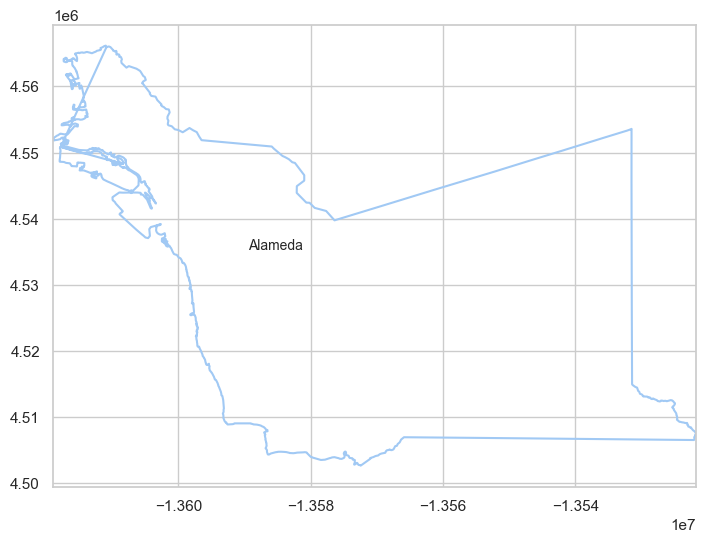

In [69]:
#Plotting a specific shape
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

#Lets view the boundaries of Alameda county to verify the function works
#It is correctly plotted
alameda = 'Alameda'
alameda_id= df[df.CountyName == alameda].index[0]

plot_shape(alameda_id,alameda)

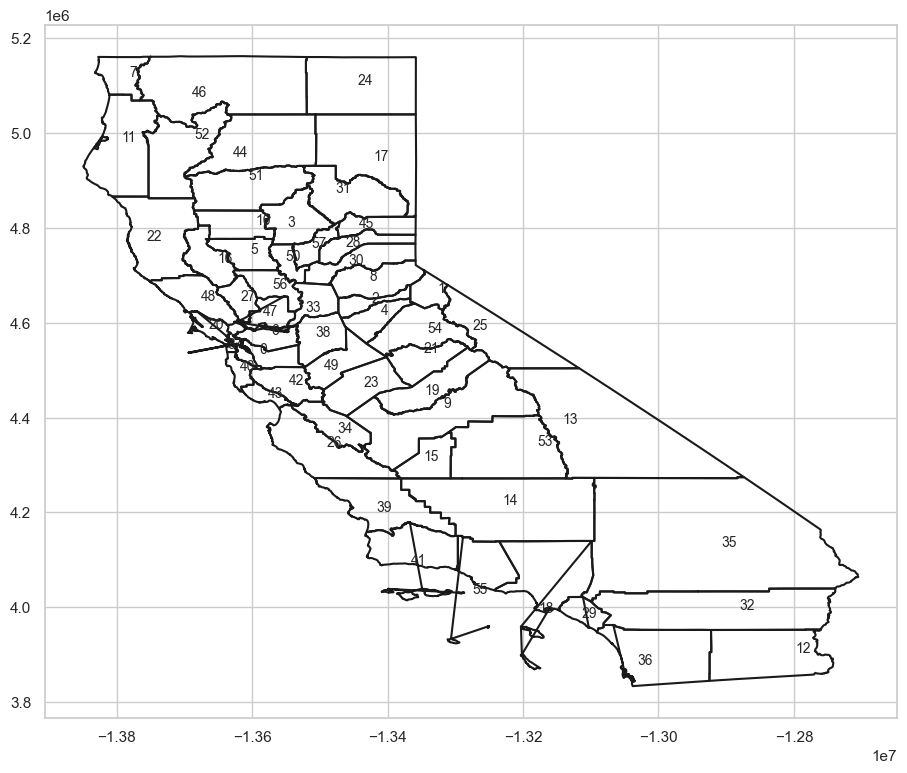

In [70]:
#Plotting a complete map
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

#Plot map of counties
plot_map(sf)

<Figure size 1100x900 with 0 Axes>

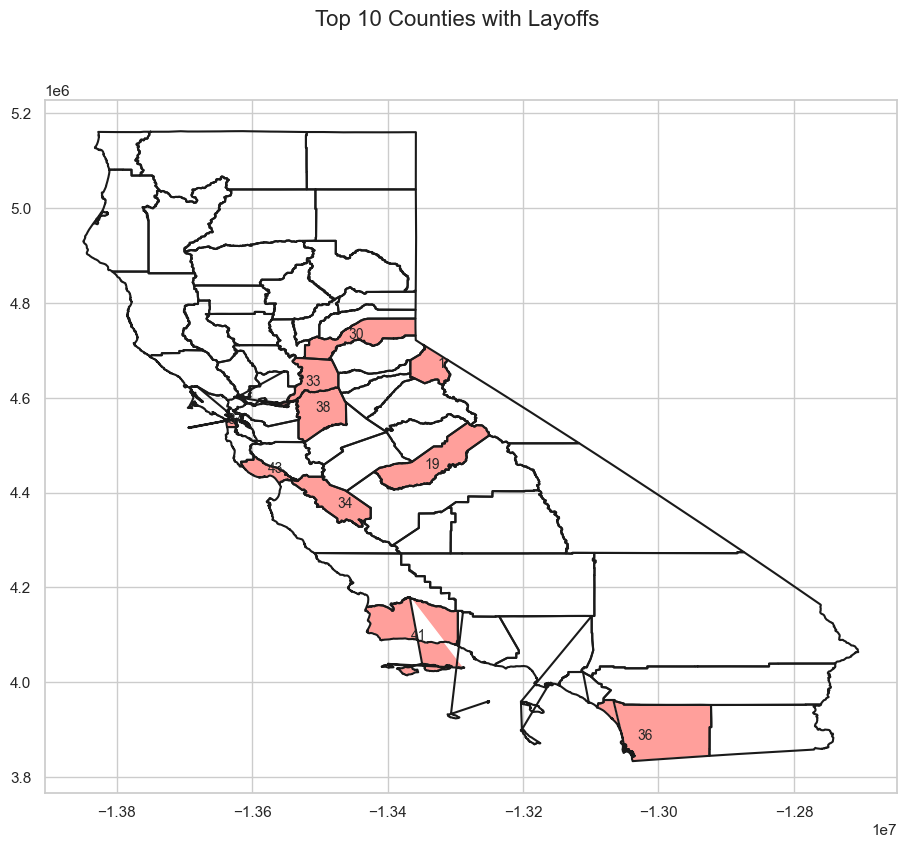

In [71]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

id = list(top10_df['OBJECTID'])
plot_map_fill_multiples_ids("Top 10 Counties with Layoffs", 
                            id, sf, color = 'r')


1: 2 => 123 
2: 124 => 342 
3: 343 => 761 
4: 762 => 1992 
5: 1993 => 5144 
6: 5145 => 13349 

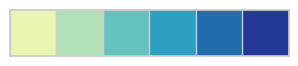

<Figure size 1100x900 with 0 Axes>

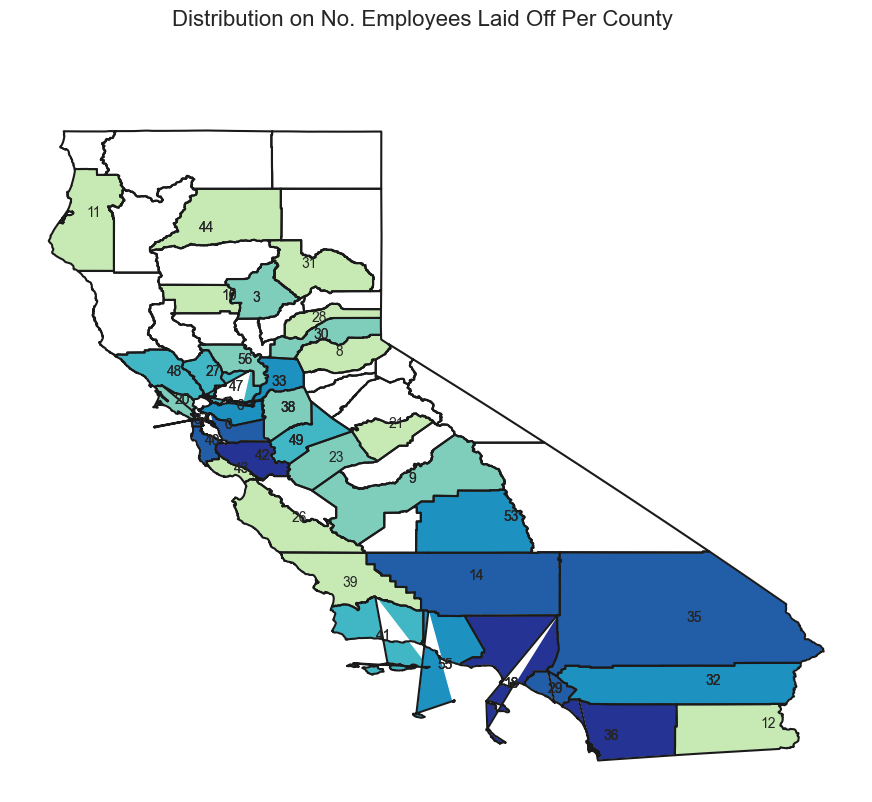

In [72]:
#Function for creating heatmaps
def calc_color(data, color=None):
        if color   == 1: 
            color_sq = ['#dadaebFF',
                        '#bcbddcF0',
                        '#9e9ac8F0',
                        '#807dbaF0',
                        '#6a51a3F0',
                        '#54278fF0'] 
            colors = 'Purples'
        elif color == 2: 
            color_sq = ['#c7e9b4',
                        '#7fcdbb',
                        '#41b6c4',
                        '#1d91c0',
                        '#225ea8',
                        '#253494']
            colors = 'YlGnBu'
        elif color == 3: 
            color_sq = ['#f7f7f7',
                        '#d9d9d9',
                        '#bdbdbd',
                        '#969696',
                        '#636363',
                        '#252525'] 
            colors = 'Greys'
        elif color == 9:
            color_sq = ['#ff0000',
                        '#ff0000',
                        '#ff0000',
                        '#ff0000',
                        '#ff0000',
                        '#ff0000']
        else:            
            color_sq = ['#ffffd4',
                        '#fee391',
                        '#fec44f',
                        '#fe9929',
                        '#d95f0e',
                        '#993404']
            colors = 'YlOrBr'
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            #print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;


def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
         
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            ax.plot(x, y, 'k')
                
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    

#Adapting the prior functions
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
#        i = comunas(i).upper()
        comuna_id.append(df[df.CountyName == i].index[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

title = 'Distribution on No. Employees Laid Off Per County'
data = county_employee_layoff_time_group['Total Employees']
names = county_employee_layoff_time_group['County']

plot_comunas_data(sf, title, names, data, 2, True)

# Hide grid lines
plt.grid(False)

# Hide axes ticks
plt.xticks([])
plt.yticks([])

#Remove axis
plt.axis('off')
#plt.annotate()

plt.savefig('/Users/leslieleiva/Documents/GitHub/WARN-Notice-Analysis/Images/Distribution_Employees_County_California.png')

<h3>Plotly: Interactive Map of California Counties</h3>

In [73]:
#Rename colymn
df = df.rename(columns={
    'CountyName':'County'
    })

#Merge the fips columns with the all the county info
county_data_fips_df = county_employee_layoff_time_group.merge(df[['County_FIP','County']],on='County')

#Add the prefix California FIPS code '06'
county_data_fips_df['County_FIP'] = '06' + county_data_fips_df['County_FIP'].astype(str)

#View table
county_data_fips_df.head()

,County,Layoff Status,No. of Employees,Total Employees,Percentage of Employees,Notice-Processed,Processed-Effective,Notice-Completion,County_FIP
0,Alameda,Closure Permanent,1549,3096,50%,33,36,55,06001
1,Alameda,Layoff Permanent,1409,3096,46%,33,36,55,06001
2,Alameda,Layoff Temporary,138,3096,4%,33,36,55,06001
3,Butte,Closure Permanent,227,229,99%,24,45,43,06007
4,Butte,Layoff Permanent,2,229,1%,24,45,43,06007


In [74]:
import plotly.figure_factory as ff
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#Declaring variables for plot
values = county_data_fips_df['Total Employees'].tolist()
fips = county_data_fips_df['County_FIP'].tolist()
county = county_data_fips_df['County'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = px.colors.sequential.Sunset

fig = ff.create_choropleth(
    fips=fips,
    values=values, 
    scope=['California'],
    show_hover=True, 
    show_state_data=True,
    colorscale=colorscale, 
    binning_endpoints=endpts, 
    round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='No. Employees Laid Off by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True
    #text = county
)

#Transparent background
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    }
)


fig.layout.template = None


fig.update_layout(
    #title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

<h1>Top/Low 10 Bar Charts</h1>

<h3>Matplotlib: "County and Layoff Status" Stacked HBar</h3>

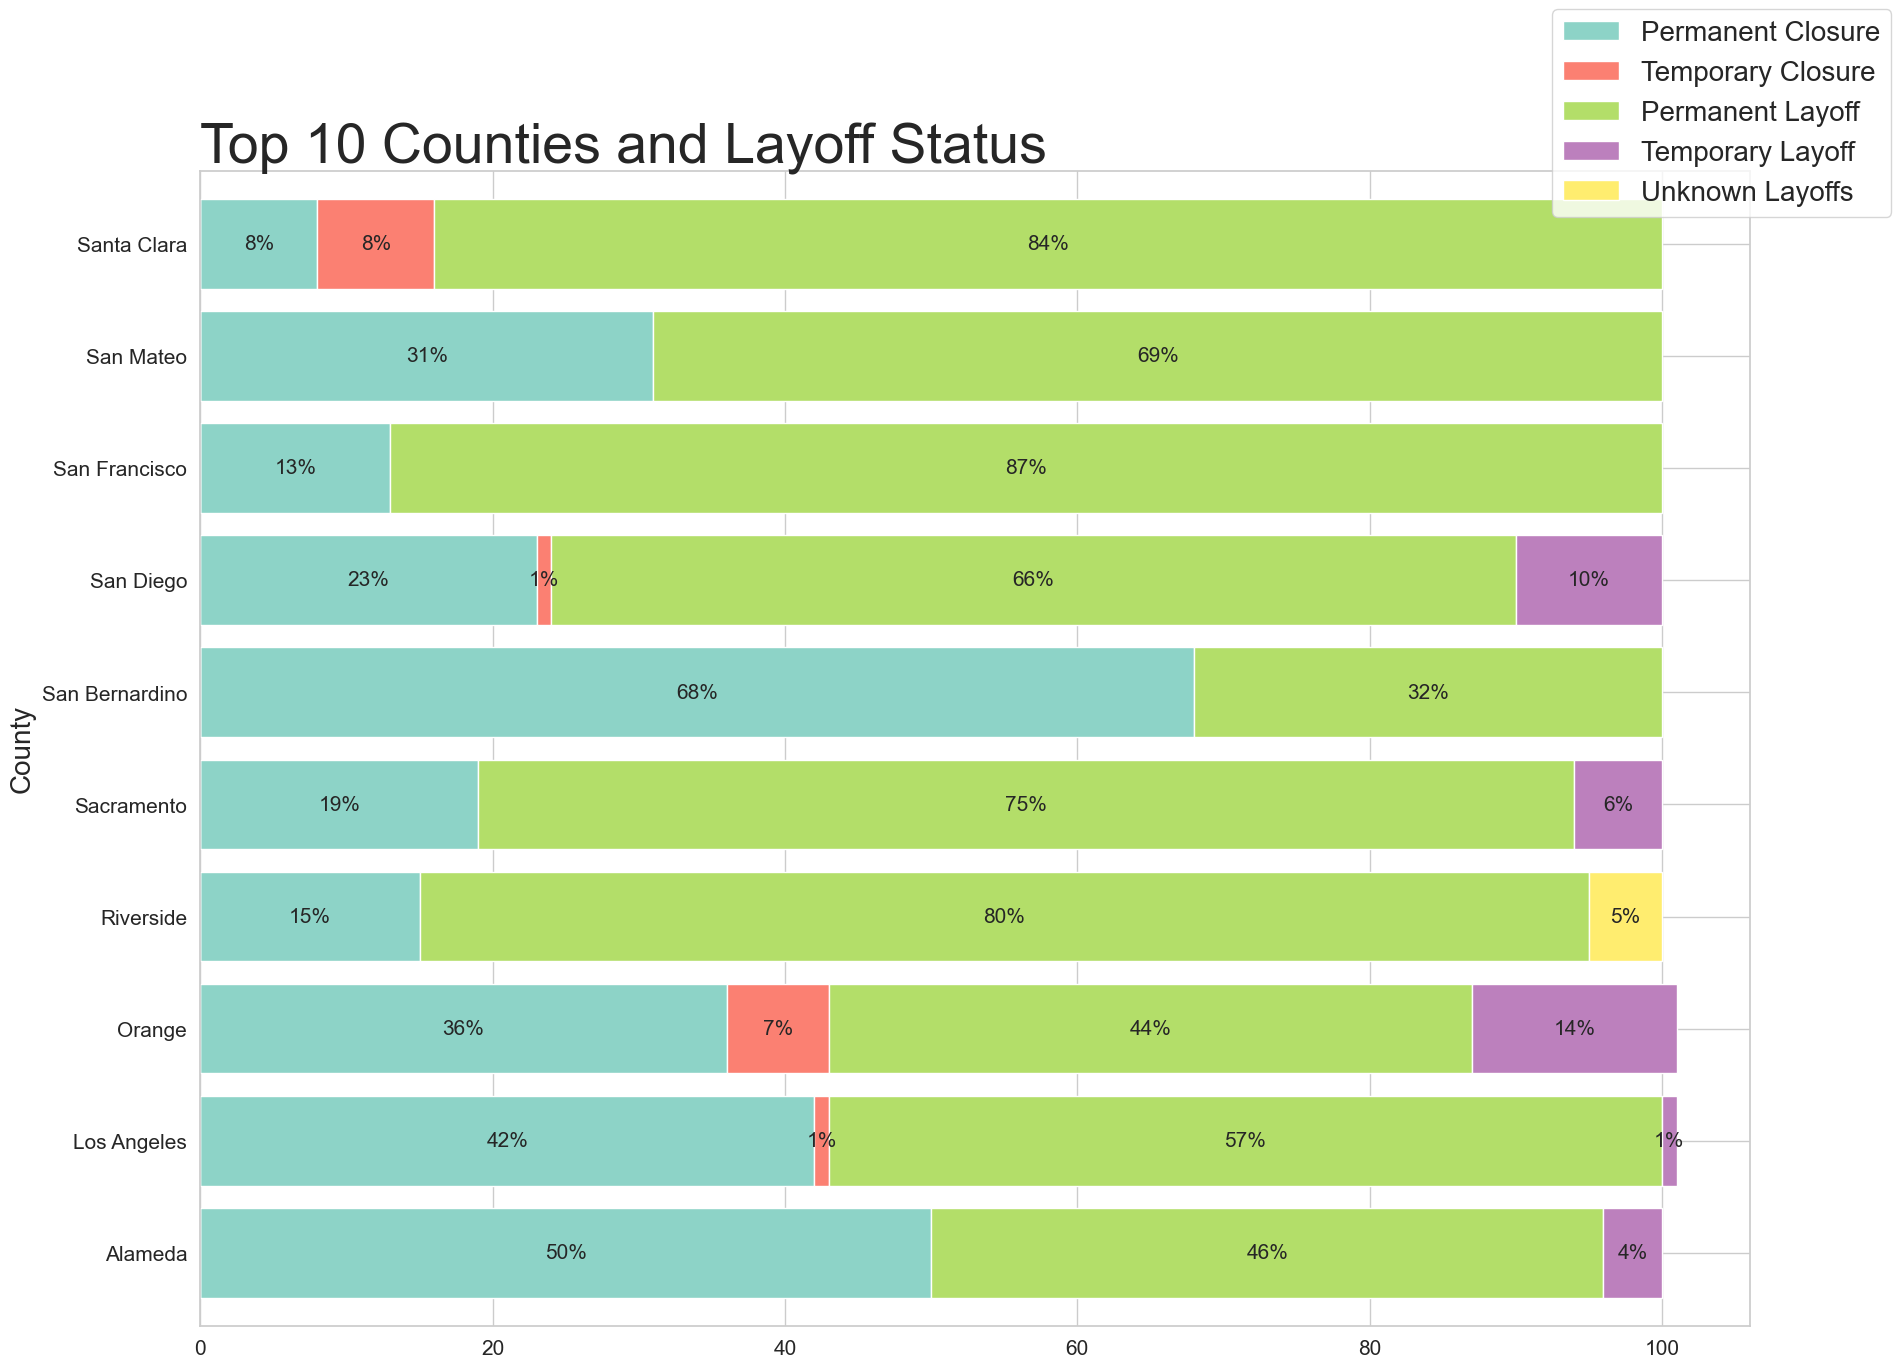

In [132]:
#Create a new dataframe from previous dataframe
county_percent_df = top_county_employee_layoff_percent[[
    'County',
    'Layoff Status',
    'Percentage of Employees'
]]

#Remove the '%' and change type to integer
county_percent_df['Percentage of Employees'] = county_percent_df['Percentage of Employees'].str.replace('%','').astype('int')

#Fill in NaN w/ Zero
county_percent_df = county_percent_df.pivot_table(columns='Layoff Status',index='County').fillna(0)

ax = county_percent_df.plot.barh(stacked = True,
                                figsize=(20,15),
                                width=0.8, 
                                colormap='Set3',
                                fontsize=15,
                                align='center')

#Labeling x y axis
ax.set_ylabel('County',fontsize=20)
ax.set_xlabel('',fontsize=15)

#Naming the plot
plt.title(f"Top 10 Counties and Layoff Status",
          fontsize=40,
          loc='left')


#Renaming the Legend
ax.legend(fontsize=20,
          loc='center right',
          bbox_to_anchor=(1.1, 1.05),
          labels=['Permanent Closure',
                  'Temporary Closure',
                  'Permanent Layoff',
                  'Temporary Layoff',
                  'Unknown Layoffs'],
                  )

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}%' if x>0 else'', label_type='center',fontsize=15)

#Save image 
plt.savefig("/Users/leslieleiva/Documents/GitHub/WARN-Notice-Analysis/Images/County_Layoff_Status_BarH_Matplotlib.png")

<h3>Plotly: County and No. Layoff Stacked HBar</h3>

In [129]:
import os

fig = px.bar(topcounty_layoffs_group, x='County', 
             y='No. Layoffs', 
             color='Layoff Status',
             text_auto='.s',
             title='Top 10 Counties That Filed For Layoffs',
             #Changing colors on graph
             color_discrete_sequence=px.colors.qualitative.Pastel
            )
#Update graph so that results are in decsending order
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

#Edit the text in the stacked bars
fig.update_traces(textfont_size=8, textangle=0, textposition="outside", cliponaxis=False)

#Transparent background
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    }
)

#Save plot as image file
fig.write_image("/Users/leslieleiva/Documents/GitHub/WARN-Notice-Analysis/Images/Top10_County_Plotly.png")

#View plot
fig.show()

In [130]:
#Group together County & Layoff Status
lowcounty_layoffs_group = low_df.groupby(['County','Layoff Status']).count()

#Rewrite the dataframe to remove unneeded columns
lowcounty_layoffs_group = lowcounty_layoffs_group[['Company']]

#Reset Index in order to plot with plotly
lowcounty_layoffs_group = lowcounty_layoffs_group.reset_index()

#Pivot Table while filling in Nan w/ zeros & type to int
lowcounty_layoffs_group = lowcounty_layoffs_group.rename(columns={
    "Company":"No.Cases"
})

#Ploting the counties with the lowest layoffs
fig = px.bar(lowcounty_layoffs_group, x='County', 
             y='No.Cases', 
             color='Layoff Status',
             text_auto='.s',
             title='Bottom 10 Counties That Filed For Layoffs',
             #Changing colors on graph
             color_discrete_sequence=px.colors.qualitative.Pastel
            )
#Update graph so that results are in decsending order
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

#Edit the text in the stacked bars
fig.update_traces(textfont_size=8, textangle=0, textposition="outside", cliponaxis=False)

#Transparent background
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    }
)

#Save plot as image file
fig.write_image("/Users/leslieleiva/Documents/GitHub/WARN-Notice-Analysis/Images/Low10_County_Plotly.png")

#View plot
fig.show()